# South African Language Classificaion Project
By: HJ van den Berg

Due date: 03/12/2021


## Table of Contents

1. Introduction
2. Import Python Modules
3. Reading the Data
4. Data Analysis
5. Data Processing
6. Training and Testing Sets
7. Text to Numeric Convertion
8. Model Building
9. Model Evaluation
10. Kaggle Submission
11. Conclusion

## 1. Introduction
In this project, the problem we aim to solve is the classification of text data into eleven possible languages. South Africa is a multicultural society with eleven official languages, thus it is important to be able to classify each language to be able able to comunicate effectivaly with systems and devices.
To accomplish this task we will:
- Read and clean the raw text data.
- Create a set features and targets.
- Visualize the features and targets.
- Build machine learning models to identify the languages.
- Asses the models to determine the predictive power, and select the best model.



## 2. Import Python Modules

In order to effectivaly manipulate the data we need the right tools for the job. Below we will import the neccesary modules that we will be using to interact with the data.

In [108]:
# Import packages

# Database manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Natural language Toolkit packages.
# Necessary libraries and modules that are 
# going to help us do the data processing 
# from the nltk library.
import nltk

# Regular expression
import re


# To make bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


# Packages to create models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC  
from sklearn.neighbors import KNeighborsClassifier

# Train test split, to train the model.
from sklearn.model_selection import train_test_split

# Metrics to determine the accuracy of the model
from sklearn.metrics import f1_score

# Display images
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

## 3. Reading the Data
The training data for this project is located in a file called 'train_set.csv' which can be download from Github at: https://github.com/henre7860/RSA_Language_Identification.git. 

In [27]:
# Import dataset

df = pd.read_csv("data/train_set.csv")
pd.set_option('display.max_colwidth',None)

## 4. Data Analysis

With Exploritory Data Analysis, we will look at the following:
- Identify the target and features.
- Look at the data information and the shape.
- Check for null values.
- Identify unique target values.
- Create a visual distribution of the data.

In [43]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


Thus 'lang_id' is the target and 'text' is the features in the data set.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


Below is the shape of the data, wee can see there are 33 000 rows and 2 columns.

In [31]:
df.shape

(33000, 2)

Here we check for null values, and as we can see there are no null values in the data set.

In [33]:
df.isnull().sum()

lang_id    0
text       0
dtype: int64

Here we identify the unique values in the target variable and check the total values of the uniques targets.

In [35]:
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [36]:
df['lang_id'].value_counts()

ssw    3000
tsn    3000
xho    3000
nso    3000
tso    3000
afr    3000
sot    3000
ven    3000
nbl    3000
eng    3000
zul    3000
Name: lang_id, dtype: int64

Below we can see the distribution of the target variable in the form of a pie chart, and as we can see the data is evenly distributed.

<AxesSubplot:ylabel='lang_id'>

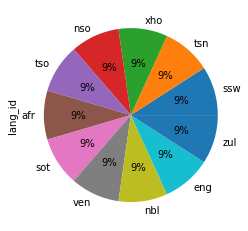

In [39]:
df['lang_id'].value_counts().plot(kind='pie', autopct='%1.0f%%')


## 5. Data Processing

In data precessing we will start with cleaning the data to ensure the data is consistent for the traing stage.

First we will separate the target and features variable.

In [85]:
X = df['text']
y = df['lang_id']

Next is the text cleaning process.

In [87]:
# Create an empty list for the cleaned data
clean_list = []

#Loop through each through each row.
for i in range(len(X)):
    # Transform all the data to lowercase
    tweet=X.iloc[i].lower()
    
    # Remove digits and puntuation from the data.
    tweet = re.sub(r'[-]',' ',tweet)
    tweet = re.sub(r'[_]', ' ', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub('[0-9]+', '', tweet)
            
    # Remove whitespaces for, the data
    tweet = re.sub("\\s+", " ", tweet)
    tweet = tweet.lstrip() 
    tweet = tweet.rstrip()
   
    clean_list.append(tweet)  # Creates a list of the cleaned tweets.
    


Create an new column in the dataset with the cleaned text and call it 'text_clean' and have look at it.

In [90]:
df['text_clean'] = clean_list

In [91]:
df.head()

,lang_id,text,text_clean
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,umgaqo siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo,i dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months,the province of kwazulu natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


## 6. Training and Testing Sets

Before we can build predictive models we must split our data into training and testing sets. The training set will be used to train a model and the testing set will be used to test how accurate the model is in classifying unseen data.

In [94]:
# Split data

# Declare the target and features
X = clean_list      # Features
y = df['lang_id']   # Targets

# Data is split into training and testing sets, from test_size =0.3, 70% of the data is use for traing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state = 42)


## 7. Text to Numeric Convertion

We will be using the TfidfVectorizer method to convert the text data into numeric data. The TD-IDF vectorizer reflects the importance of a word in the text as a numerical statistic. We will use max_features=10 000 so that our model is not to resource intensive.



In [95]:
# Declare TfidfVectorizer
count_vector_2 = TfidfVectorizer(max_df=0.9, ngram_range=(1, 5), analyzer= 'char',max_features=10000)

# Fit and transform the data
X_train = count_vector_2.fit_transform(X_train).toarray() # Only fit training data
X_test = count_vector_2.transform(X_test).toarray()

## 8. Model Building
 Here we will create five different models to train and test the data on.
 

#### Model 1: MultinomialNB

In [96]:
# Initialize model

MNB_model_1 = MultinomialNB(alpha=0.1)


# Fit the model
MNB_model_1.fit(X_train, y_train)

# Predict on the test set
y_pred_1 = MNB_model_1.predict(X_test)


# Determince accuracy
f1score_1 = f1_score(y_test, y_pred_1, average= 'macro')
print('macro f1 score:', f1score_1)


macro f1 score: 0.9989748558212916


#### Mode 2: LogisticRegression

In [97]:
# Initialize model
LR_model_1 = LogisticRegression()
# Fit the model
LR_model_1.fit(X_train, y_train)

# Predict on the test set
y_pred_2 = LR_model_1.predict(X_test)

# Determince accuracy
f1score_2 = f1_score(y_test, y_pred_2, average= 'macro')
print('macro f1 score:', f1score_2)


macro f1 score: 0.9978407391670158


#### Model 3: LinearSVC

In [98]:
# Initialize model
linear_svc_model_1 = LinearSVC(C=0.9, random_state=1)

# Fit the model
linear_svc_model_1.fit(X_train, y_train)

# Predict on the test set
y_pred_3 = linear_svc_model_1.predict(X_test)

# Determince accuracy
f1score_3 = f1_score(y_test, y_pred_3, average= 'macro')
print('macro f1 score:', f1score_3)
# Standard = macro f1 score: 0.9870048

macro f1 score: 0.9989745815008203


#### Model 4: KNeighborsClassifier

In [99]:
# Initialize model
knn_model_1 = KNeighborsClassifier(n_neighbors=1,weights='uniform',metric='euclidean')
# Fit the model
knn_model_1.fit(X_train, y_train)

# Predict on the test set
y_pred_4 = knn_model_1.predict(X_test)

# Determince accuracy
f1score_4 = f1_score(y_test, y_pred_4, average= 'macro')
print('macro f1 score:', f1score_4)


macro f1 score: 0.9505252921727995


#### Model 5: RidgeClassifier

In [112]:
# Initialize model
RidgeC_model_1 = RidgeClassifier(alpha=0.2125)

# Fit the model
RidgeC_model_1.fit(X_train, y_train)

# Determince accuracy
y_pred_5 = RidgeC_model_1.predict(X_test)

# Determince accuracy
f1score_5 = f1_score(y_test, y_pred_5, average= 'macro')
print('macro f1 score:', f1score_5)


KeyboardInterrupt: 

## 9. Model Evaluation
Now we will compare the model accuracy scores and sort them in descending order.

In [106]:
#Create a dictionary, and store the model name and score.
model_comp = {'model_name' : ['MultinomialNB_1', 'LogisticRegression_1',
                               'LinearSVC_1', 'KNN_1', 'RidgeC_model_1'
                             ],
                   'f1_score' : [f1score_1, f1score_2, 
                                 f1score_3 ,f1score_4,
                                f1score_5
                                ]
                                 }

# Create a DataFrame from the dictionary.
model_comp_df = pd.DataFrame(model_comp)

In [107]:
# Call the Data Frame and sort the scores in descending order.
model_comp_df.sort_values('f1_score',ascending=False)



,model_name,f1_score
4,RidgeC_model_1,0.999389
0,MultinomialNB_1,0.998975
2,LinearSVC_1,0.998975
1,LogisticRegression_1,0.997841
3,KNN_1,0.950525


## 10. Kaggle Submission
Below is the code I use to create my Kaggel submission file, it follows the following steps:
- Load the testing data 'test_set.csv'
- Identify the features
- Clean the data
- Text to Numeric Transformation
- Create a Prediction
- Create a output data frame with the required columns
- Save the data frame to a csv file

In [111]:
# Load the testing data 'test_set.csv'
test_df = pd.read_csv('data/test_set.csv')

# Identify the features
test_features = test_df['text']

#Clean the data

cleaned_data = []

for i in range(len(test_features)):
    tweet=test_features.iloc[i].lower()   
    tweet = re.sub(r'[-]',' ',tweet)
    tweet = re.sub(r'[_]', ' ', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub('[0-9]+', '', tweet)   
    tweet = re.sub("\\s+", " ", tweet)
    tweet = tweet.lstrip() 
    tweet = tweet.rstrip()
   
    cleaned_data.append(tweet)
    
# TrText to Numeric Transformation                        
X_fin = count_vector_2.transform(cleaned_data).toarray() 
#Create a Prediction
y_pred_test = RidgeC_model_1.predict(X_fin)
#Create a output data frame with the required columns
test_df['lang_id'] = y_pred_test
output_df = test_df[['index', 'lang_id']]

# Save the data frame to a csv file
output_df.to_csv('Kaggel submission files/RidgeC_model_1.csv', index = False)

Below is a screenshot of the model scores from the Kaggel Competition that can be found at https://www.kaggle.com/c/south-african-language-identification-2021

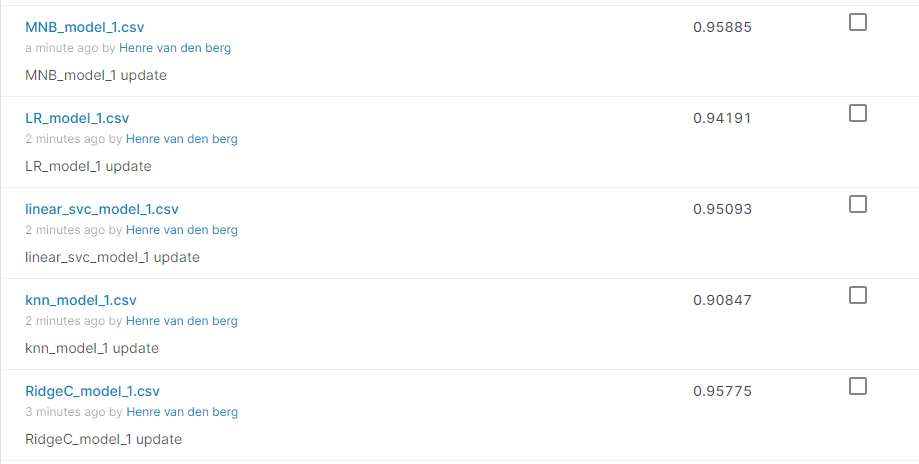

In [109]:
Image("Kaggel submission files/kaggle submission proof.png")

## 11. Conclusion

As we can see from the training dataset the most accurate model is RidgeClassifier model with a score of 0.999389. If we look at the screenshot of the score from the Kaggel Competition we see that the RidgeClassifier model obtained a score of 0.95775 and the MultinomialNB model obtained a score of 0.95885 which is slightly higher. The difference between the scores of these two models are 0.001 which is small, therefore these models can be said to be equaly accurate.
The predictive power of the models can be improved by additional processing and Hyperparameter tuning.